In [1]:
import pandas as pd

In [2]:
# combine 2018 and 2019 data
police_incidents_2019 = pd.read_csv('Original/police_incidents_2019.csv', usecols = [17])
police_incidents_2019['neighborhood'] = police_incidents_2019['neighborhood'].astype(str)
police_incidents_2019['neighborhood'] = police_incidents_2019['neighborhood'].apply(lambda x: x.upper())
police_incidents_2019= police_incidents_2019.rename(columns = {'neighborhood': 'NEIGHBORHOOD'})

police_incidents_2018 = pd.read_csv('Original/police_incidents_2018.csv', usecols = [17])
police_incidents_2018['Neighborhood'] = police_incidents_2018['Neighborhood'].astype(str)
police_incidents_2018['Neighborhood'] = police_incidents_2018['Neighborhood'].apply(lambda x: x.upper())
police_incidents_2018= police_incidents_2018.rename(columns = {'Neighborhood': 'NEIGHBORHOOD'})

police_incidents = pd.concat([police_incidents_2018,police_incidents_2019])

# clean neighborhood data to match demographic names
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('CEDAR - ISLES - DEAN','CEDAR-ISLES-DEAN')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('LIND - BOHANON','LIND-BOHANON')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('WEBBER - CAMDEN','WEBBER-CAMDEN')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('NEAR - NORTH','NEAR NORTH')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('COMO','COMO (MINNEAPOLIS)')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace("STEVEN'S SQUARE - LORING HEIGHTS","STEVEN'S SQUARE-LORING HEIGHTS")
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('STEVENS SQUARE - LORING HEIGHTS',"STEVEN'S SQUARE-LORING HEIGHTS")
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('WILLARD - HAY','WILLARD-HAY')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('PROSPECT PARK - EAST RIVER ROAD','PROSPECT PARK-EAST RIVER ROAD')
police_incidents['NEIGHBORHOOD'] = police_incidents['NEIGHBORHOOD'].str.replace('WILLARD - HAY','WILLARD-HAY')

police_incidents=police_incidents.groupby('NEIGHBORHOOD').apply(lambda x: x.count())    
police_incidents= police_incidents.rename(columns = {'NEIGHBORHOOD':'NUMBER_OF_INCIDENTS'})

police_incidents.head()


,NUMBER_OF_INCIDENTS
NEIGHBORHOOD,
ARMATAGE,119
AUDUBON PARK,263
BANCROFT,214
BELTRAMI,101
BOTTINEAU,153


In [3]:
# Add neighborhood with no data so it is represented
south_uptown = pd.DataFrame([['SOUTH UPTOWN', 0]], columns = ['NEIGHBORHOOD', 'NUMBER_OF_INCIDENTS'])
south_uptown = south_uptown.set_index('NEIGHBORHOOD')

police_incidents= pd.concat([police_incidents, south_uptown])
police_incidents.head(1)

,NUMBER_OF_INCIDENTS
NEIGHBORHOOD,
ARMATAGE,119


In [4]:
pca = pd.read_csv('Original/MSP Neighborhoods_2013-2017.csv', header = 1)
pca= pca.rename(columns = {'geography': 'NEIGHBORHOOD-share', 'City':'City-share'})

# Filter Minneapolis data only
pca = pca[pca['City-share']=='Minneapolis']
pca = pca.drop('City-share', 1)


# Filter "share" columns only 
cols = list(pca.columns)
new_cols=[]
for col in cols:
    if 'share' in col:
        new_cols.append(col)
pca_cleaned = pca[new_cols]


# Remove null values 
new_cols = []
cols = list(pca_cleaned.columns)
for col in cols:
    if pca_cleaned[col].isnull().sum()==0:
        new_cols.append(col)

pca_cleaned= pca_cleaned[new_cols]
pca_cleaned= pca_cleaned.rename(columns = {'NEIGHBORHOOD-share':'NEIGHBORHOOD'})
pca_cleaned['NEIGHBORHOOD']=pca_cleaned['NEIGHBORHOOD'].apply(lambda x: x.upper()) 

# Remove share margin columns
new_cols = []
for col in list(pca_cleaned.columns):
    if 'share margin' in (col):
        pass
    else:
        new_cols.append(col)
pca_cleaned = pca_cleaned[new_cols]


#Remove columns whose share is 100%
new_cols = []
for col in list(pca_cleaned.columns):
    if (col == 'NEIGHBORHOOD'):
        new_cols.append(col)
    elif pca_cleaned[col].mean() == 1:
        pass
    else:
        new_cols.append(col)
pca_cleaned = pca_cleaned[new_cols]

# Remove extra versions of columns
new_cols = []
for col in list(pca_cleaned.columns):
    if ').1' in col:
        pass
    elif ').2' in col:
        pass
    elif ').3' in col:
        pass
    else:
        new_cols.append(col)
pca_cleaned = pca_cleaned[new_cols]
pca_cleaned.head()

,NEIGHBORHOOD,Same residence - share (2013-2017 ACS),Different residence in the U.S. - share (2013-2017 ACS),Different residence outside the U.S. - share (2013-2017 ACS),Unemployed - share (2013-2017 ACS),Population with a disability - share (2013-2017 ACS),Less than high school - share (2013-2017 ACS),High school diploma or GED - share (2013-2017 ACS),Some college or associate degree - share (2013-2017 ACS),Bachelor's degree - share (2013-2017 ACS),...,Householder 85 years and over - share (2010 Census),Race and Ethnicity - White alone - share (2010 Census),Race and Ethnicity - Of Color - share (2010 Census),Race and Ethnicity - Hispanic or Latino - share (2010 Census),Population under age 18 - share (2010 Census),Black or African American alone - share (2010 Census),American Indian and Alaska Native alone - share (2010 Census),Asian or Pacific Islander alone - share (2010 Census),Some Other Race alone - share (2010 Census),Two or More Races - share (2010 Census)
0,CORCORAN,0.845727,0.149577,0.004696,0.048277,0.117417,0.128202,0.268129,0.244179,0.242705,...,0.003750,0.478437,0.240233,0.281329,0.359626,0.128108,0.041096,0.027651,0.006088,0.037291
1,KENNY,0.884484,0.114783,0.000733,0.068516,0.080562,0.053313,0.091646,0.222585,0.350612,...,0.021852,0.884237,0.082046,0.033717,0.276688,0.025569,0.001967,0.030346,0.001405,0.022759
2,COOPER,0.910513,0.085369,0.004117,0.032227,0.085722,0.079707,0.127971,0.206581,0.281536,...,0.013730,0.839577,0.107521,0.052902,0.272503,0.032599,0.012868,0.032313,0.000572,0.029168
3,EAST HARRIET,0.822977,0.171110,0.005913,0.033149,0.069533,0.030420,0.110498,0.225757,0.364531,...,0.029126,0.864872,0.109600,0.025527,0.294404,0.047447,0.002775,0.023307,0.001942,0.034129
4,CEDAR-ISLES-DEAN,0.823730,0.161694,0.014575,0.013042,0.047774,0.022450,0.090082,0.083262,0.283887,...,0.022414,0.878882,0.090752,0.030366,0.224394,0.020014,0.001725,0.046584,0.002415,0.020014


In [5]:
pca_cleaned = pd.merge(pca_cleaned, police_incidents, on = 'NEIGHBORHOOD', how = 'left')
pca_cleaned.head(1)

,NEIGHBORHOOD,Same residence - share (2013-2017 ACS),Different residence in the U.S. - share (2013-2017 ACS),Different residence outside the U.S. - share (2013-2017 ACS),Unemployed - share (2013-2017 ACS),Population with a disability - share (2013-2017 ACS),Less than high school - share (2013-2017 ACS),High school diploma or GED - share (2013-2017 ACS),Some college or associate degree - share (2013-2017 ACS),Bachelor's degree - share (2013-2017 ACS),...,Race and Ethnicity - White alone - share (2010 Census),Race and Ethnicity - Of Color - share (2010 Census),Race and Ethnicity - Hispanic or Latino - share (2010 Census),Population under age 18 - share (2010 Census),Black or African American alone - share (2010 Census),American Indian and Alaska Native alone - share (2010 Census),Asian or Pacific Islander alone - share (2010 Census),Some Other Race alone - share (2010 Census),Two or More Races - share (2010 Census),NUMBER_OF_INCIDENTS
0,CORCORAN,0.845727,0.149577,0.004696,0.048277,0.117417,0.128202,0.268129,0.244179,0.242705,...,0.478437,0.240233,0.281329,0.359626,0.128108,0.041096,0.027651,0.006088,0.037291,344


In [6]:
pca_cleaned.to_csv('Cleaned/MSP_Neighborhoods_2013-2017_cleaned.csv', index = False)

In [7]:
#check that all neighborhood strings match in both datasets part 1 of 2
unique_to_police_incidents = pca_cleaned['NEIGHBORHOOD'].unique()

In [8]:
#check that all neighborhood strings match in both datasets part 2 of 2
unique_to_demographics= pca_cleaned['NEIGHBORHOOD'].unique()
unique_to_demographics==unique_to_police_incidents
neighborhoods = unique_to_demographics

In [9]:
# Remove Neighborhood for analysis
pca_cleaned2 = pca_cleaned.drop(columns = ['NEIGHBORHOOD', 'NUMBER_OF_INCIDENTS'])
pca_cleaned2 = pca_cleaned2.astype(float)
pca_cleaned2.head(1)


,Same residence - share (2013-2017 ACS),Different residence in the U.S. - share (2013-2017 ACS),Different residence outside the U.S. - share (2013-2017 ACS),Unemployed - share (2013-2017 ACS),Population with a disability - share (2013-2017 ACS),Less than high school - share (2013-2017 ACS),High school diploma or GED - share (2013-2017 ACS),Some college or associate degree - share (2013-2017 ACS),Bachelor's degree - share (2013-2017 ACS),Graduate or professional degree - share (2013-2017 ACS),...,Householder 85 years and over - share (2010 Census),Race and Ethnicity - White alone - share (2010 Census),Race and Ethnicity - Of Color - share (2010 Census),Race and Ethnicity - Hispanic or Latino - share (2010 Census),Population under age 18 - share (2010 Census),Black or African American alone - share (2010 Census),American Indian and Alaska Native alone - share (2010 Census),Asian or Pacific Islander alone - share (2010 Census),Some Other Race alone - share (2010 Census),Two or More Races - share (2010 Census)
0,0.845727,0.149577,0.004696,0.048277,0.117417,0.128202,0.268129,0.244179,0.242705,0.116786,...,0.00375,0.478437,0.240233,0.281329,0.359626,0.128108,0.041096,0.027651,0.006088,0.037291


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [11]:
from sklearn.decomposition import PCA
X = pca_cleaned2
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:\t", X.shape)
print("transformed shape:\t", X_pca.shape)

original shape:	 (51, 197)
transformed shape:	 (51, 2)


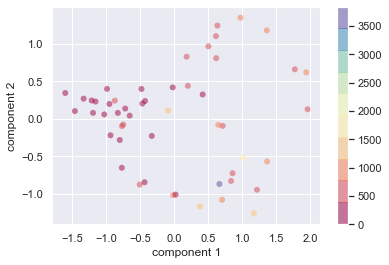

In [12]:
#Plot the first two principal components of each point to learn about the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c = pca_cleaned.NUMBER_OF_INCIDENTS, edgecolor= 'none', alpha = 0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
x = X_pca[:,0]
y = X_pca[:,1]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


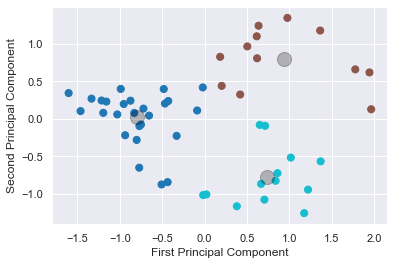

In [14]:
fig, ax = plt.subplots()
plt.scatter(x, y, c = y_kmeans, s =50, cmap = 'tab10')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black', s=200, alpha = 0.25)
# plt.title('Clustering of Demographically Similar Minneapolis Neighborhoods',fontsize = 14)
plt.xlabel('First Principal Component', fontsize = 12)
plt.ylabel('Second Principal Component', fontsize = 12)

# n = 0
# for i, txt in enumerate(neighborhoods):
    
#     if (txt == 'DOWNTOWN WEST')|(txt == 'COMO (MINNEAPOLIS)')|(txt == 'PROSPECT PARK-EAST RIVER ROAD'):
#         plt.annotate(txt, (x[i], y[i]),arrowprops=dict(facecolor='black', shrink=0.05))
#     else:
#         pass
#     n +=.2
plt.savefig('msp_neighborhd_clusters5.png', dpi=150, facecolor='w', edgecolor='w',
        format='png',
        transparent=False, bbox_inches=None, pad_inches=0.3,
        frameon=None, metadata=None)
plt.show()